In [1]:
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis
import os
import matplotlib.pyplot as plt

## Data import

In [2]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

nucleus_dataset_p4g4 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset.csv')
all_surfaces = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

# 20x CD206 P4G4+TCPS+Smooth data
## 20x_CD206_all_surfaces_all_features

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8919176185531326
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8978460551000833
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8921285842321864


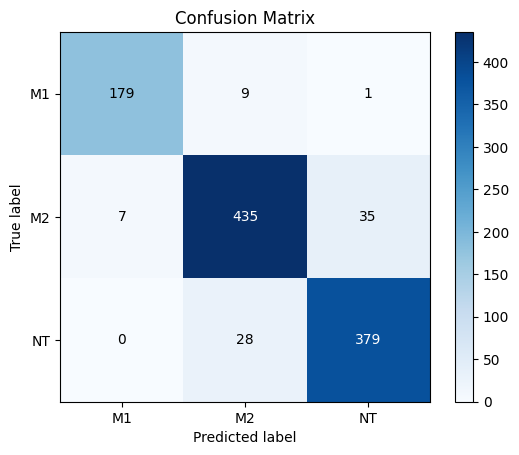

Calculate metrics for M1 and M2 only
____________________________________
 M1,   M2
[[179   9]
 [  7 435]]
Accuracy (Correctly predicted M1+M2 / all predictions): 0.9746031746031746
Precision (Correctly predicted M1 / all cells predicted as M1): 0.9623655913978495
Sensitivity (Correctly predicted M1 / all actual M1): 0.9521276595744681
Specificity (Correctly predicted M2 / all actual M2): 0.9841628959276018
F1-score (How good the model performs in correctly identifying M1 and avoiding misclassifying M2): 0.9572192513368984


In [3]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces, confusion_matrix=True)
macrophages_analysis.calculate_metrics_for_M1_M2(pipe, test_data)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9983121453709689
AUC score for M2 0.98125870583766
AUC score for NT 0.9862466889493917
Average AUC 0.9886058467193402


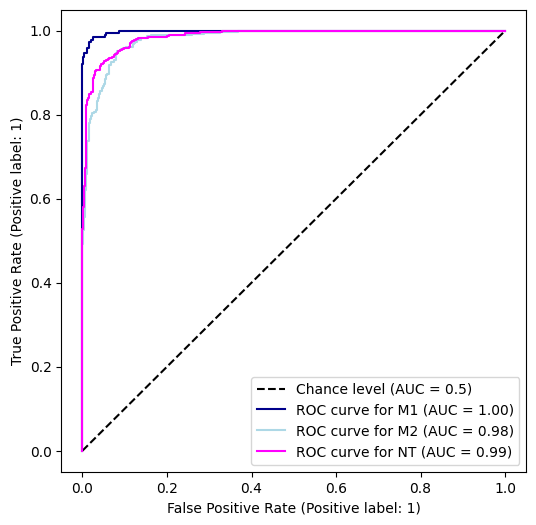

In [4]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

## Get the most important features

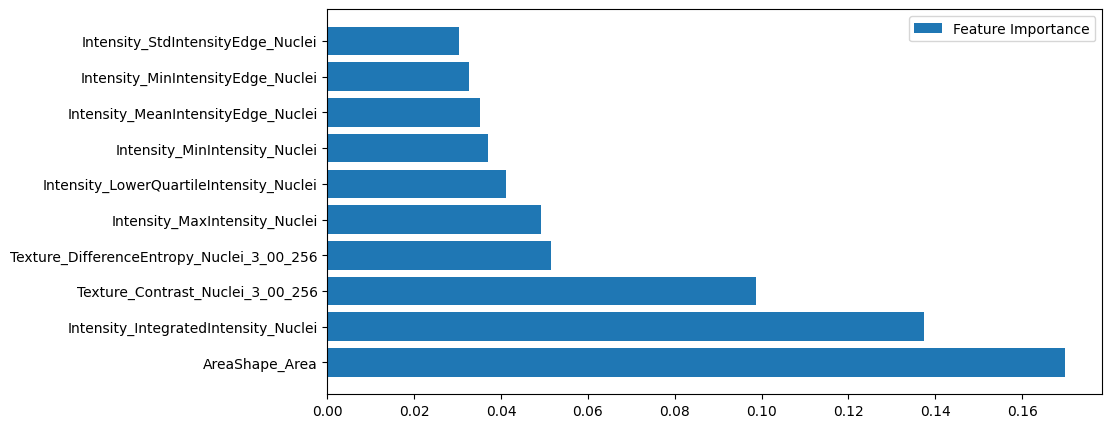

In [5]:
important_features_smooth = macrophages_analysis.get_best_features(pipe, all_surfaces.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features_smooth['Feature'], important_features_smooth['Importance'], label='Feature Importance')
ax.legend()

# 20x CD206 P4G4+TCPS+Smooth data without intestity features
## 20x_CD206_all_surfaces_shape_texture

In [6]:
nucleus_dataset_p4g4_no_intensity = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_smooth_no_intensity = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_tcps_no_intensity = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset_no_intensity_data.csv')
all_surfaces_no_intensity = pd.concat([nucleus_dataset_p4g4_no_intensity, nucleus_dataset_smooth_no_intensity, nucleus_dataset_tcps_no_intensity])

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.785643821391485
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8098781596169244
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.7863921987487965


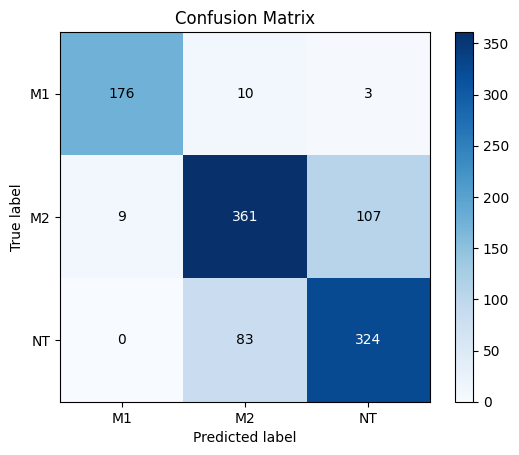

In [7]:
pipe_no_intensity, test_data_no_intensity = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_intensity, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9967918791448204
AUC score for M2 0.9125793198542342
AUC score for NT 0.9250724926400602
Average AUC 0.9448145638797051


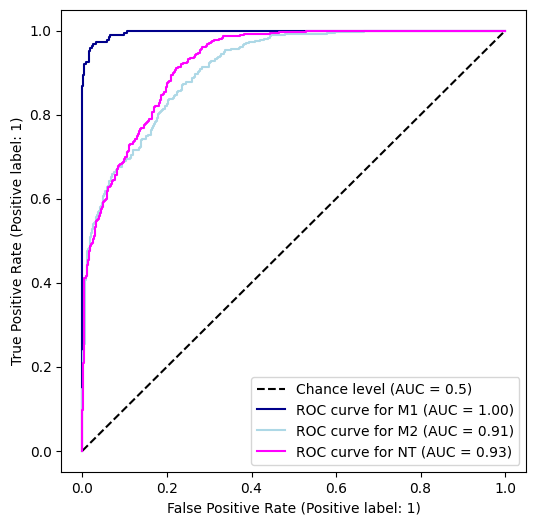

In [8]:
macrophages_analysis.make_multiclass_roc(pipe_no_intensity, test_data_no_intensity)

## Get the most important features

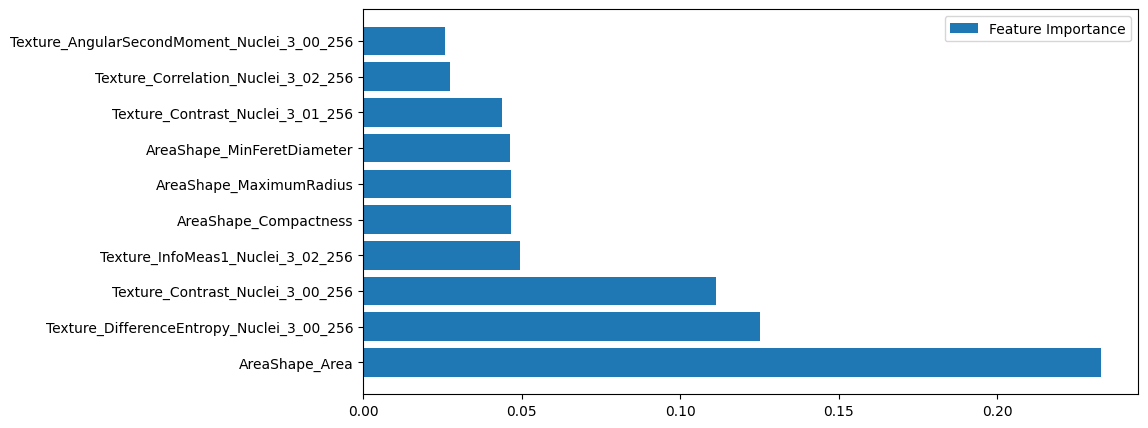

In [9]:
important_features_smooth = macrophages_analysis.get_best_features(pipe_no_intensity, all_surfaces_no_intensity.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features_smooth['Feature'], important_features_smooth['Importance'], label='Feature Importance')
ax.legend()

# 20x CD206 P4G4+TCPS+Smooth data without shape features
## 20x_CD206_all_surfaces_texture_intensity

In [10]:
nucleus_dataset_p4g4_no_shape = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_smooth_no_shape = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_tcps_no_shape = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset_no_shape_data.csv')
all_surfaces_no_shape = pd.concat([nucleus_dataset_p4g4_no_shape, nucleus_dataset_smooth_no_shape, nucleus_dataset_tcps_no_shape])

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8853409484250605
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8902413513525724
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8853881334354028


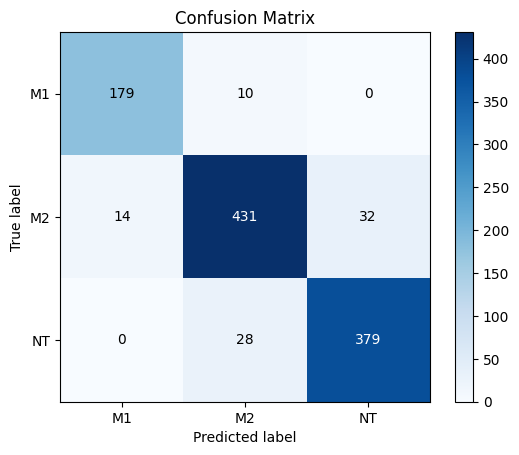

In [11]:
pipe_no_shape, test_data_no_shape = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_shape, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9973006296535708
AUC score for M2 0.9787577561099151
AUC score for NT 0.9864274594004323
Average AUC 0.9874952817213062


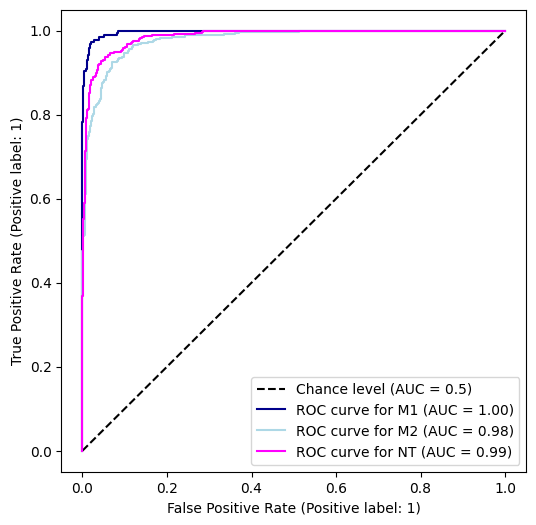

In [12]:
macrophages_analysis.make_multiclass_roc(pipe_no_shape, test_data_no_shape)

## Get the most important features

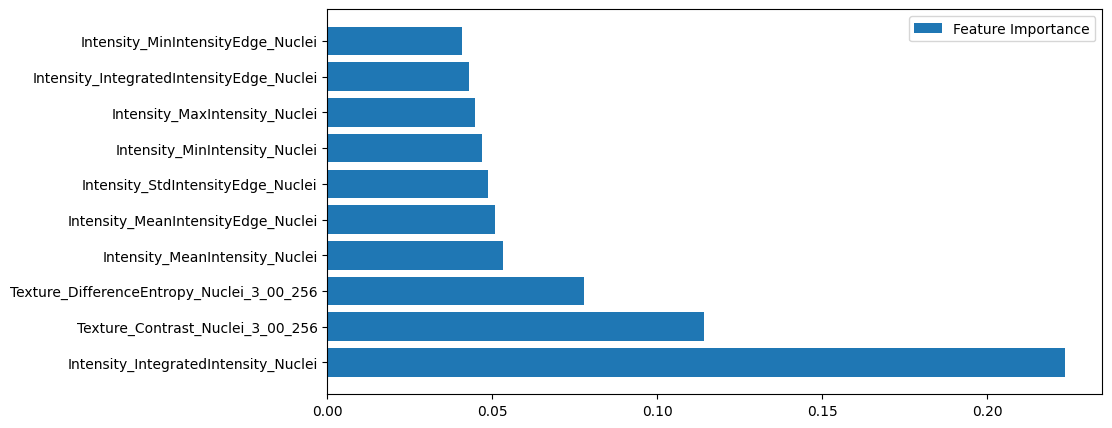

In [13]:
important_features_tcps = macrophages_analysis.get_best_features(pipe_no_shape, all_surfaces_no_shape.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features_tcps['Feature'], important_features_tcps['Importance'], label='Feature Importance')
ax.legend()

# 20x CD206 P4G4+TCPS+Smooth data only shape features
## 20x_CD206_all_surfaces_shape

In [14]:
nucleus_dataset_p4g4_shape = macrophages_analysis.select_features_by_name(nucleus_dataset_p4g4, 'Area')
nucleus_dataset_smooth_shape = macrophages_analysis.select_features_by_name(nucleus_dataset_smooth, 'Area')
nucleus_dataset_tcps_shape = macrophages_analysis.select_features_by_name(nucleus_dataset_tcps, 'Area')
all_surfaces_shape = pd.concat([nucleus_dataset_p4g4_shape, nucleus_dataset_smooth_shape, nucleus_dataset_tcps_shape])

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.6113014884042922
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.6641218063856664
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.615983095271325


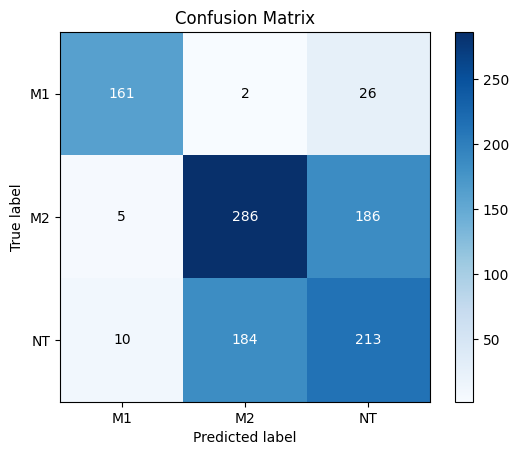

In [15]:
pipe_shape, test_data_shape = macrophages_analysis.make_nucleus_classifier(all_surfaces_shape, confusion_matrix=True)

AUC score for M1 0.9834027628145275
AUC score for M2 0.7381846833537348
AUC score for NT 0.6861124023286185
Average AUC 0.802566616165627


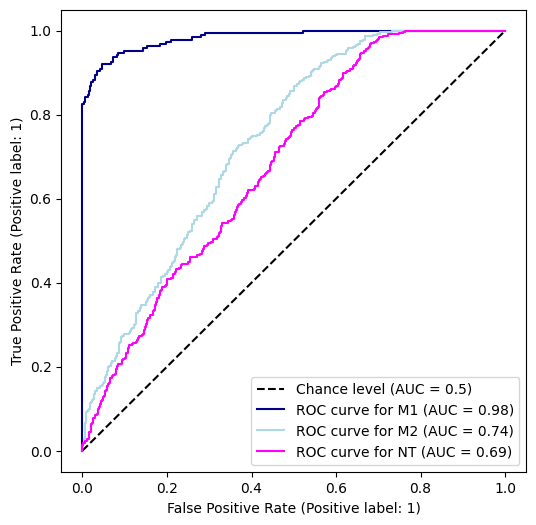

In [16]:
macrophages_analysis.make_multiclass_roc(pipe_shape, test_data_shape)

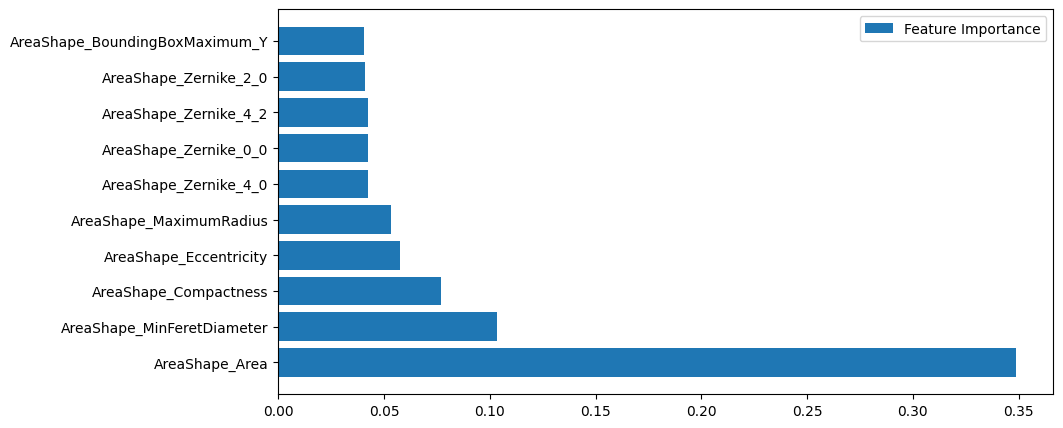

In [17]:
important_features = macrophages_analysis.get_best_features(pipe_shape, all_surfaces_shape.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()

# 20x CD206 P4G4+TCPS+Smooth data only texture features
## 20x_CD206_all_surfaces_texture

In [18]:
nucleus_dataset_p4g4_texture = macrophages_analysis.select_features_by_name(nucleus_dataset_p4g4, 'Texture')
nucleus_dataset_smooth_texture = macrophages_analysis.select_features_by_name(nucleus_dataset_smooth, 'Texture')
nucleus_dataset_tcps_texture = macrophages_analysis.select_features_by_name(nucleus_dataset_tcps, 'Texture')
all_surfaces_texture = pd.concat([nucleus_dataset_p4g4_texture, nucleus_dataset_smooth_texture, nucleus_dataset_tcps_texture])

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.7382312218760817
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.7489158902357234
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.7385972263631542


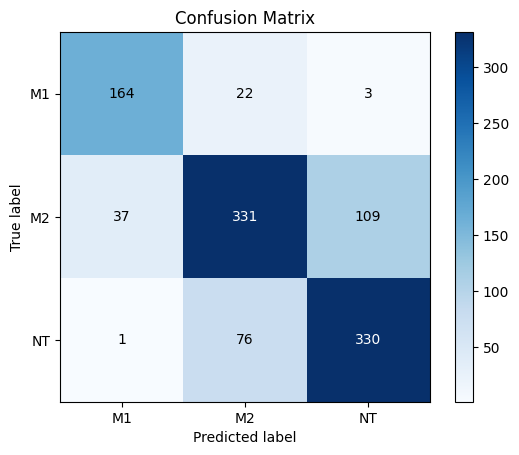

In [19]:
pipe_texture, test_data_texture = macrophages_analysis.make_nucleus_classifier(all_surfaces_texture, confusion_matrix=True)

AUC score for M1 0.979266920443391
AUC score for M2 0.8456446189129486
AUC score for NT 0.8961861124023286
Average AUC 0.9070325505862228


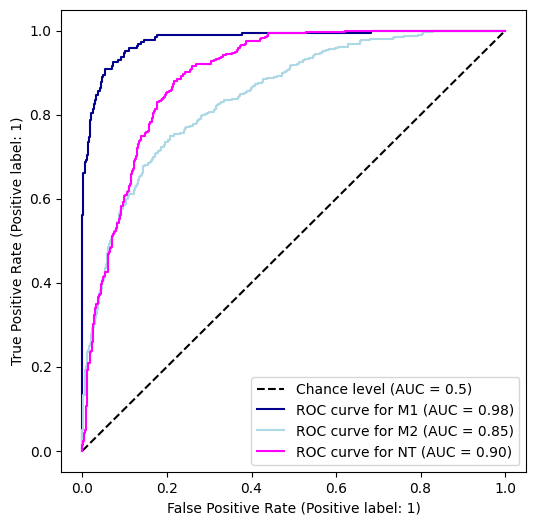

In [20]:
macrophages_analysis.make_multiclass_roc(pipe_texture, test_data_texture)

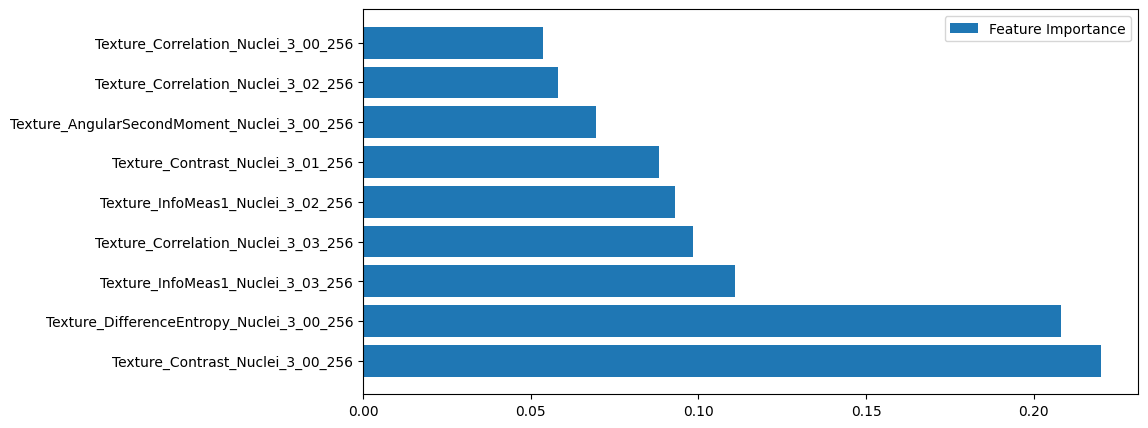

In [21]:
important_features = macrophages_analysis.get_best_features(pipe_texture, all_surfaces_texture.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()

# 20x CD206 P4G4+TCPS+Smooth data only intensity features
## 20x_CD206_all_surfaces_intensity

In [22]:
nucleus_dataset_p4g4_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset_p4g4, 'Intensity')
nucleus_dataset_smooth_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset_smooth, 'Intensity')
nucleus_dataset_tcps_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset_tcps, 'Intensity')
all_surfaces_intensity = pd.concat([nucleus_dataset_p4g4_intensity, nucleus_dataset_smooth_intensity, nucleus_dataset_tcps_intensity])

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8798026998961579
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8845083320668744
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8799094086329902


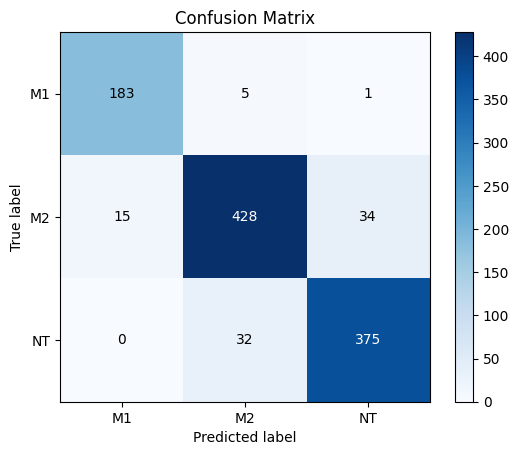

In [23]:
pipe_intensity, test_data_intensity = macrophages_analysis.make_nucleus_classifier(all_surfaces_intensity, confusion_matrix=True)

AUC score for M1 0.9966242907419378
AUC score for M2 0.9725423156472923
AUC score for NT 0.9815466572223329
Average AUC 0.983571087870521


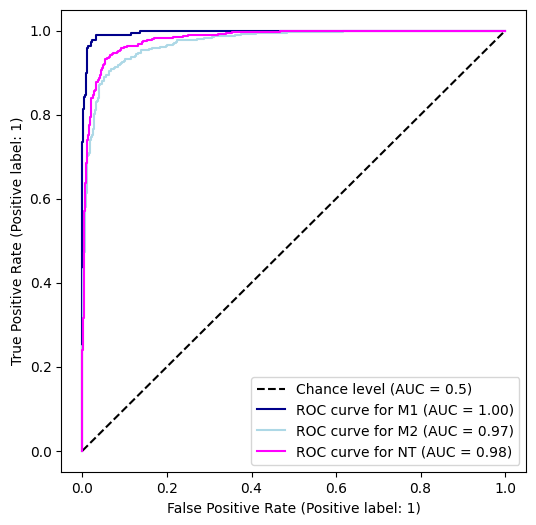

In [24]:
macrophages_analysis.make_multiclass_roc(pipe_intensity, test_data_intensity)

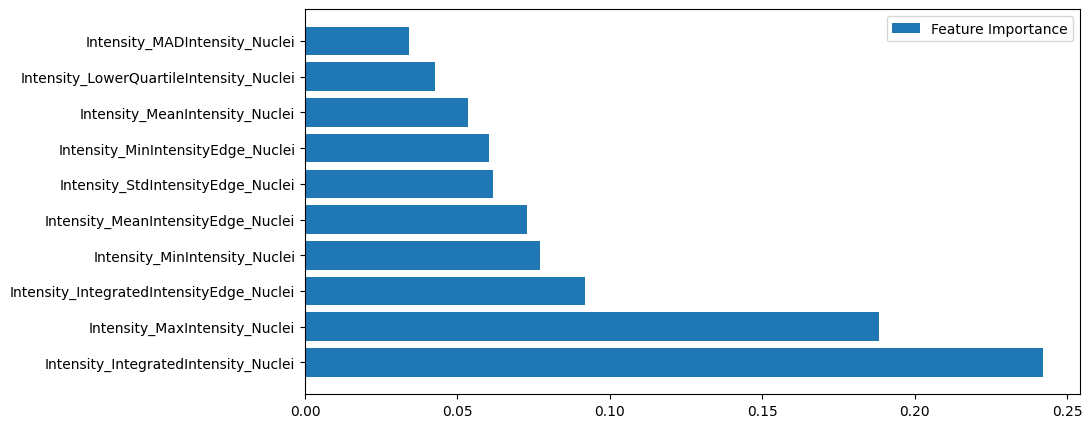

In [25]:
important_features = macrophages_analysis.get_best_features(pipe_intensity, all_surfaces_intensity.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()